In [2]:
import pandas as pd
import numpy as np
import zipfile
import glob
from fuzzywuzzy import fuzz
from fuzzy_match import algorithims
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
input_file='DS - Assignment Part 2 data set.zip'

In [4]:
with zipfile.ZipFile(input_file, 'r') as zip_ref:
    zip_ref.extractall()

In [5]:
files=glob.glob('*.csv')

In [6]:
# Detecting duplicate entries with same pid and deleting them except the one with lowest discounted_price
def remove_duplicate_items(df):
    duplicate_items=df.pid.value_counts()[df.pid.value_counts()>1]
    for i in range(duplicate_items.shape[0]):
        item=duplicate_items.index[i]
        prices=df[df.pid==item]['discounted_price']
        duplicate_entries=prices.index
        duplicate_entries=duplicate_entries.delete(prices.argmin())
        df=df.drop(index=duplicate_entries, axis=0)
    return(df)

In [7]:
def process_df(df):
    df=remove_duplicate_items(df)
    return df   
    

In [8]:
df_amazon=pd.read_csv(files[0], encoding_errors='ignore' )
df_amazon.shape

(20000, 15)

In [9]:
df_amazon.head(2)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,982,438,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32143,29121,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."


In [10]:
df_amazon=process_df(df_amazon)

In [11]:
df_flipkart=pd.read_csv(files[1])
df_flipkart.shape

(20000, 15)

In [12]:
df_flipkart.head(2)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."


In [13]:
df_flipkart=process_df(df_flipkart)

In [14]:
df_amazon.shape, df_flipkart.shape

((19998, 15), (19998, 15))

In [15]:
important_columns=['pid','product_name','retail_price','discounted_price']

In [16]:
final_df=pd.merge(df_amazon[important_columns],df_flipkart[important_columns], on='pid',how='outer', suffixes=(' in Amazon',' in Flipkart'))

In [17]:
final_df

,pid,product_name in Amazon,retail_price in Amazon,discounted_price in Amazon,product_name in Flipkart,retail_price in Flipkart,discounted_price in Flipkart
0,SRTEH2FF9KEDEFGF,Alisha Solid Women's Cycling Shorts,982,438,Alisha Solid Women's Cycling Shorts,999.0,379.0
1,SBEEH3QGU7MFYJFY,FabHomeDecor Fabric Double Sofa Bed,32143,29121,FabHomeDecor Fabric Double Sofa Bed,32157.0,22646.0
2,SHOEH4GRSUBJGZXE,AW Bellies,991,551,AW Bellies,999.0,499.0
3,SRTEH2F6HUZMQ6SJ,Alisha Solid Women's Cycling Shorts,694,325,Alisha Solid Women's Cycling Shorts,699.0,267.0
4,PSOEH3ZYDMSYARJ5,Sicons All Purpose Arnica Dog Shampoo,208,258,Sicons All Purpose Arnica Dog Shampoo,220.0,210.0
...,...,...,...,...,...,...,...
19993,STIE7KFJAKSTDY9G,WALLDESIGN SMALL VINYL STICKER,1498,876,WallDesign Small Vinyl Sticker,1500.0,730.0
19994,STIE9F5URNQGJCGH,WALLMANTRA LARGE VINYL STICKERS STICKER,1415,1424,Wallmantra Large Vinyl Stickers Sticker,1429.0,1143.0
19995,STIE7VAYDKQZEBSD,ELITE COLLECTION MEDIUM ACRYLIC STICKER,1284,1196,Elite Collection Medium Acrylic Sticker,1299.0,999.0
19996,STIE8YSVEPPCZ42Y,ELITE COLLECTION MEDIUM ACRYLIC STICKER,1492,1364,Elite Collection Medium Acrylic Sticker,1499.0,1199.0


In [18]:
final_df.dtypes

pid                              object
product_name in Amazon           object
retail_price in Amazon            int64
discounted_price in Amazon        int64
product_name in Flipkart         object
retail_price in Flipkart        float64
discounted_price in Flipkart    float64
dtype: object

In [19]:
#Changing all price columns to float
final_df['retail_price in Amazon']=final_df['retail_price in Amazon'].astype('float')
final_df['discounted_price in Amazon']=final_df['discounted_price in Amazon'].astype('float')



In [20]:
final_df.isna().sum()

pid                              0
product_name in Amazon           0
retail_price in Amazon           0
discounted_price in Amazon       0
product_name in Flipkart         0
retail_price in Flipkart        78
discounted_price in Flipkart    78
dtype: int64

In [21]:
def get_ratio(word1,word2):
    
    '''function to compare the values in each row
    for the two columns in the same dataframe and
    return the ratio for the entire string similarity'''
    
   
    
    return fuzz.ratio(word1,word2)

In [22]:
def get_partial_ratio(word1,word2):
    
    '''function to compare the values in each row
    for the two columns in the same dataframeand
    return the ratio for partial string similarity'''
    
    
    
    return fuzz.partial_ratio(word1,word2)


In [23]:
def get_token_sort_ratio(word1,word2):
    
    '''function to compare the values in each row
    for the two columns in the same dataframeand
    return the ratio for string similarity by
    ignoring word order'''
    
   
    
    return fuzz.token_sort_ratio(word1,word2)

In [24]:
def get_token_set_ratio(word1,word2):
    
    '''function to compare the values in each row
    for the two columns in the same dataframeand
    return the ratio for string similarity by
    ignoring duplicate words and word order'''
    
    
    
    return fuzz.token_set_ratio(word1,word2)

In [25]:
def get_trigram_value(word1,word2):
    
    '''function to compare the values in each row
    for the two columns in the same dataframeand
    return the ratio for string similarity by
    ignoring duplicate words and word order'''
    
    
    
    return round(algorithims.trigram(word1, word2), 3)

In [26]:
final_df['full_ratio'] = list(map(get_ratio,final_df['product_name in Amazon'], final_df['product_name in Flipkart']))
final_df['partial_ratio'] =list(map(get_partial_ratio,final_df['product_name in Amazon'], final_df['product_name in Flipkart']))
final_df['token_sort_ratio'] = list(map(get_token_sort_ratio,final_df['product_name in Amazon'], final_df['product_name in Flipkart']))
final_df['token_set_ratio'] = list(map(get_token_set_ratio,final_df['product_name in Amazon'], final_df['product_name in Flipkart']))
final_df['trigram'] = list(map(get_trigram_value,final_df['product_name in Amazon'], final_df['product_name in Flipkart']))
final_df.head()

,pid,product_name in Amazon,retail_price in Amazon,discounted_price in Amazon,product_name in Flipkart,retail_price in Flipkart,discounted_price in Flipkart,full_ratio,partial_ratio,token_sort_ratio,token_set_ratio,trigram
0,SRTEH2FF9KEDEFGF,Alisha Solid Women's Cycling Shorts,982.0,438.0,Alisha Solid Women's Cycling Shorts,999.0,379.0,100,100,100,100,1.0
1,SBEEH3QGU7MFYJFY,FabHomeDecor Fabric Double Sofa Bed,32143.0,29121.0,FabHomeDecor Fabric Double Sofa Bed,32157.0,22646.0,100,100,100,100,1.0
2,SHOEH4GRSUBJGZXE,AW Bellies,991.0,551.0,AW Bellies,999.0,499.0,100,100,100,100,1.0
3,SRTEH2F6HUZMQ6SJ,Alisha Solid Women's Cycling Shorts,694.0,325.0,Alisha Solid Women's Cycling Shorts,699.0,267.0,100,100,100,100,1.0
4,PSOEH3ZYDMSYARJ5,Sicons All Purpose Arnica Dog Shampoo,208.0,258.0,Sicons All Purpose Arnica Dog Shampoo,220.0,210.0,100,100,100,100,1.0


In [27]:
final_df[['full_ratio','partial_ratio','token_sort_ratio','token_set_ratio','trigram']].describe()

,full_ratio,partial_ratio,token_sort_ratio,token_set_ratio,trigram
count,19998.000000,19998.000000,19998.000000,19998.000000,19998.000000
mean,88.469097,88.481998,99.955096,99.977898,0.998913
std,25.555680,25.528167,0.579167,0.288486,0.014057
min,12.000000,12.000000,86.000000,92.000000,0.684000
25%,100.000000,100.000000,100.000000,100.000000,1.000000
50%,100.000000,100.000000,100.000000,100.000000,1.000000
75%,100.000000,100.000000,100.000000,100.000000,1.000000
max,100.000000,100.000000,100.000000,100.000000,1.000000


full_ratio and partial_ratio did average performance in matching 
token_sort_ratio, token_set_ratio and n_gram performed almost same in their best case scenarios.
We can further manually investigate the cases where they didn,t perform very well

<AxesSubplot:xlabel='trigram', ylabel='Density'>

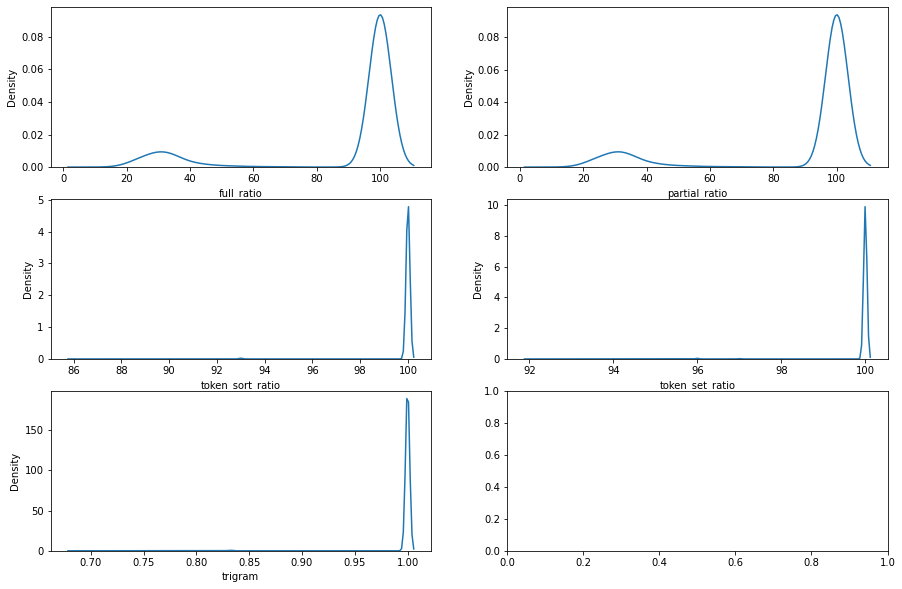

In [28]:

fig,ax=plt.subplots(3,2,figsize=(15,10))

sns.kdeplot(data=final_df,x='full_ratio', ax=ax[0,0])
sns.kdeplot(data=final_df,x='partial_ratio', ax=ax[0,1])
sns.kdeplot(data=final_df,x='token_sort_ratio', ax=ax[1,0])
sns.kdeplot(data=final_df,x='token_set_ratio', ax=ax[1,1])
sns.kdeplot(data=final_df,x='trigram', ax=ax[2,0])
#sns.kdeplot(data=final_df,x='', ax=ax[2,1])

In [29]:
final_df[final_df.token_set_ratio<final_df.token_set_ratio.quantile(0.10)]

,pid,product_name in Amazon,retail_price in Amazon,discounted_price in Amazon,product_name in Flipkart,retail_price in Flipkart,discounted_price in Flipkart,full_ratio,partial_ratio,token_sort_ratio,token_set_ratio,trigram
16644,BEBEGAREKEHWEHZS,ABCD S BEAN BAG WITH FOAM FILLING,2297.0,1004.0,ABCD Small Bean Bag With Foam Filling,2299.0,899.0,47,50,94,97,0.838
17963,SHVE58VGNPBGHKDR,GEMEI BODY GROOMER GM-729ϿϿϿϿϿϿ TRIMMER FOR MEN,986.0,790.0,Gemei Body Groomer Gm-729������ Trimmer For Men,999.0,699.0,36,36,93,95,0.881
18003,BKPEYQHBGRH6KYMH,UNITED BAGS CROSS CHAIN 35 L M LAPTOP BACKPACK,1981.0,744.0,United Bags Cross Chain 35 L Medium Laptop Bac...,1999.0,649.0,37,39,95,98,0.854
18050,BKPE4GF4HMYZRQAM,LEAF TORK 2.5 L M BACKPACK,981.0,1063.0,Leaf Tork 2.5 L Medium Backpack,990.0,899.0,46,50,91,96,0.774
18069,BKPEB2PFJPENHHJK,SAFARI ZOOM 25 L S BACKPACK,1186.0,626.0,Safari Zoom 25 L small Backpack,1198.0,549.0,38,41,86,96,0.806
...,...,...,...,...,...,...,...,...,...,...,...,...
19941,STIE7KFHYBHYKMT4,WALLDESIGN S VINYL STICKER,1288.0,767.0,WallDesign Small Vinyl Sticker,1300.0,640.0,29,31,93,96,0.833
19942,STIE88KNVG7YETY6,ELITE COLLECTION M ACRYLIC STICKER,1282.0,1274.0,Elite Collection Medium Acrylic Sticker,1299.0,999.0,25,26,93,97,0.829
19943,STIE8YSWYREWUMHN,ELITE COLLECTION M ACRYLIC STICKER,1488.0,1331.0,Elite Collection Medium Acrylic Sticker,1499.0,1199.0,25,26,93,97,0.829
19944,STIE7KFFGRD4S8PS,WALLDESIGN S VINYL STICKER,1281.0,730.0,WallDesign Small Vinyl Sticker,1300.0,640.0,29,31,93,96,0.833


# Best method token_set_ratio

In [30]:
def final_ratio(amazon_product_names,flipkart_product_names, word):
    
    '''function to compare the values in each row
    for the two columns in the same dataframeand
    return the ratio for string similarity by
    ignoring duplicate words and word order'''
    
    
    max_similarity=0
    
    for i in range(amazon_product_names.shape[0]):
        
        amazon_match=fuzz.token_set_ratio(word, amazon_product_names[i])
        flipkart_match=fuzz.token_set_ratio(word, flipkart_product_names[i])
        avg_match=(amazon_match+flipkart_match)/2
        if avg_match>max_similarity:
            max_similarity=avg_match
            matched_index=i
            
    
    
    return matched_index

In [37]:
input_text=input("Enter the product you want to search")
matched_index=final_ratio(final_df['product_name in Amazon'],final_df['product_name in Flipkart'], input_text)
pd.DataFrame(final_df.iloc[matched_index][['product_name in Amazon','retail_price in Amazon','discounted_price in Amazon',
                                    'product_name in Flipkart','retail_price in Flipkart','discounted_price in Flipkart']])

Enter the product you want to searchArnica Shampoo


,4
product_name in Amazon,Sicons All Purpose Arnica Dog Shampoo
retail_price in Amazon,208.0
discounted_price in Amazon,258.0
product_name in Flipkart,Sicons All Purpose Arnica Dog Shampoo
retail_price in Flipkart,220.0
discounted_price in Flipkart,210.0
